#### OASIS INFOBYTE INTERNSHIP

#### TASK:4 EMAIL SPAM DETECTION WITH MACHINE LEARNING

#### PROBLEM STATEMENTE

We've all been the recipient of spam mats before Spam mail, or junk mail is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content

In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classity emails into spam and non-spam. Let get

started!

Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

Import Data

In [3]:
data=pd.read_csv('spam.csv',encoding="ISO-8859-1")

read data

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Drop unnecessary columns

In [5]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

Rename column names

In [6]:
data.columns=['category','message']

In [7]:
data.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Generate discriptive statistics

In [8]:
data.describe()

,category,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Check Null or not

In [9]:
data.isnull().sum()

category    0
message     0
dtype: int64

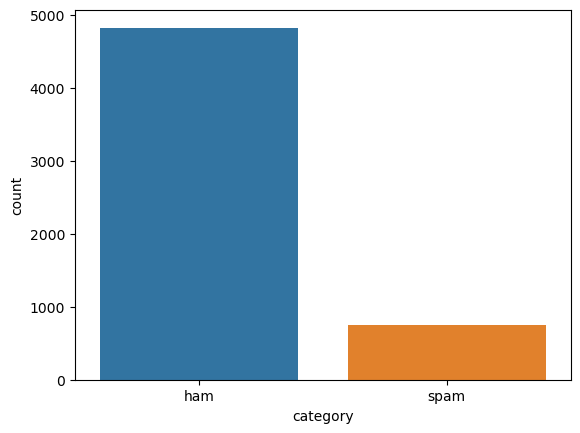

In [10]:
sns.countplot(x='category',data=data)
plt.show()

In [11]:
data.drop_duplicates(inplace=True)
data=data.fillna(' ')

Split data into train and test

In [12]:
train,test=train_test_split(data,test_size=0.30)
train_x=data['message'].values
train_y=data['category'].values

test_x=data['message'].values
test_y=data['category'].values

In [13]:
cv=CountVectorizer()
train_x=cv.fit_transform(train_x)
test_x=cv.transform(test_x)

Train model using vector method

In [14]:
model=SVC()
model.fit(train_x,train_y)
predct=model.predict(test_x)
metrics.accuracy_score(predct,test_y)

0.995550396595086

Accuracy of testing and test dataset

In [15]:
train_accuracy=model.score(train_x,train_y)
test_accuracy=model.score(test_x,test_y)
print(train_accuracy)
print(test_accuracy)

0.995550396595086
0.995550396595086


Plot the result

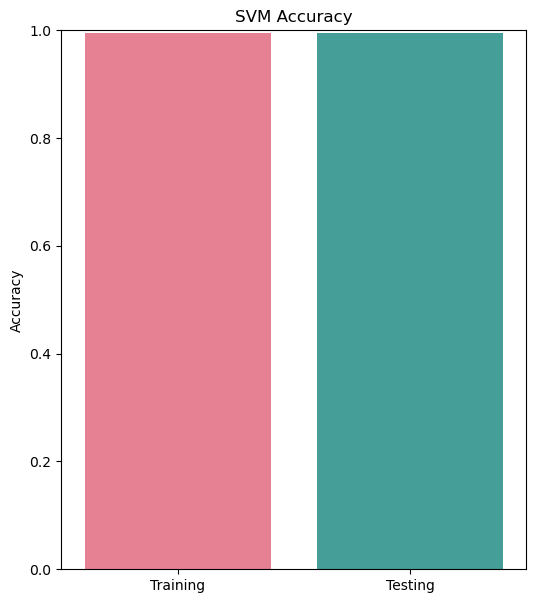

In [16]:
plt.figure(figsize=(6,7))
sns.barplot(x=['Training','Testing'],y=[train_accuracy,test_accuracy],palette='husl')
plt.ylim([0,1])
plt.ylabel('Accuracy')
plt.title('SVM Accuracy')
plt.show()